In [2]:
# Word tokenization
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


In [3]:
# sentence tokenization

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["When learning data science, you shouldn't get discouraged!", "\nChallenges and setbacks aren't failures, they're just part of the journey.", "You've got this!"]


In [4]:
#Stop words
#importing stop words from English language.
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['any', 'regarding', 'make', '’re', 'first', 'either', 'seemed', 'another', 'but', 'say', "'s", 'hereby', 'formerly', 'over', 'anyhow', 'can', 'toward', 'yours', 'still', 'thereby']


In [5]:
from spacy.lang.en.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [learning, data, science, ,, discouraged, !, 
, Challenges, setbacks, failures, ,, journey, ., got, !]


In [6]:
# Implementing lemmatization
lem = nlp("run runs running runner")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

run run
runs runs
running running
runner runner


In [17]:
# POS tagging

# importing the model en_core_web_sm of English for vocabluary, syntax & entities
import en_core_web_sm

# load en_core_web_sm of English for vocabluary, syntax & entities
nlp = en_core_web_sm.load()

#  "nlp" Objectis used to create documents with linguistic annotations.
docs = nlp(u"All is well that ends well.")

for word in docs:
    print(word.text,word.pos_)

All DET
is AUX
well ADJ
that DET
ends VERB
well ADV
. PUNCT


In [18]:
#for visualization of Entity detection importing displacy from spacy:

from spacy import displacy

nytimes= nlp(u"""New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases.
At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday.The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.""")

entities=[(i, i.label_, i.label) for i in nytimes.ents]
entities    

[(New York City, 'GPE', 384),
 (Tuesday, 'DATE', 391),
 (At least 285, 'CARDINAL', 397),
 (September, 'DATE', 391),
 (Brooklyn, 'GPE', 384),
 (Williamsburg, 'GPE', 384),
 (four, 'CARDINAL', 397),
 (Bill de Blasio, 'PERSON', 380),
 (Tuesday, 'DATE', 391),
 (Orthodox Jews, 'ORG', 383),
 (6 months old, 'DATE', 391),
 (up to $1,000, 'MONEY', 394)]

In [19]:
docp = nlp (" In pursuit of a wall, President Trump ran into one.")

for chunk in docp.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

pursuit pursuit pobj In
a wall wall pobj of
President Trump Trump nsubj ran


In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()
mango = nlp(u'mango')
print(mango.vector.shape)
print(mango.vector)

(96,)
[ 0.20538223 -1.6033714   0.27122334  0.4102599   3.2985601   3.4889512
  1.8090308  -2.1398475   2.31565     1.5809067   4.1519527  -1.0185633
 -0.0325011  -2.7471437  -0.4177467  -2.4292274  -0.6153387   2.4422317
  0.8078671  -2.4846377   2.0988142   1.4448209  -0.552992   -1.3411183
 -0.69847786 -0.45548356  3.8267968  -4.0225782   0.81215733  0.3766132
  0.15751392 -1.1428392  -1.3328214   0.7187766   2.1567593  -3.018766
  3.4919028   0.6938907  -1.1943094  -0.10796624  4.7029977   3.551554
 -0.71505725 -4.4580555  -0.26480573  0.6314918  -0.538128   -1.1131921
 -1.1251849   0.5740081  -1.1976193  -3.5157654   0.425157   -1.7545594
 -3.058784    0.01680815  0.97784567  1.7633746   0.4561966   2.5090182
  0.35267782  0.8351371  -1.394351    0.5082075   0.75960976 -3.3654122
  2.3440146  -2.4311178   1.2401564  -1.4498216  -2.3708577   1.274456
  2.6584334   2.505236    0.24999112  0.45838034  0.7396465  -3.0134087
 -1.1449497   2.441533    0.58746856 -0.47240722 -0.99527466 

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [23]:
# Loading TSV file
df_amazon = pd.read_csv ("d:/Machine Learning/amazon_alexa 2.tsv", sep="\t")

In [24]:
# Top 5 records
df_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [25]:
# shape of dataframe
df_amazon.shape

(3150, 5)

In [26]:
# View data information
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [27]:
# Feedback Value count
df_amazon.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [46]:
df_amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [33]:
from spacy.lang.en import English
nlp = English()  # use directly
nlp = spacy.blank("en")

In [34]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

In [35]:
# Create our list of punctuation marks
punctuations = string.punctuation

In [37]:
# Create list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [38]:
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [39]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [40]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [41]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [61]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [62]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

C:\Users\Tony Diana\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x000001C324F29A08>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x000001C31AF9C048>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [63]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9333333333333333
Logistic Regression Precision: 0.9397590361445783
Logistic Regression Recall: 0.9907621247113164


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 24,  55],
       [  8, 858]], dtype=int64)

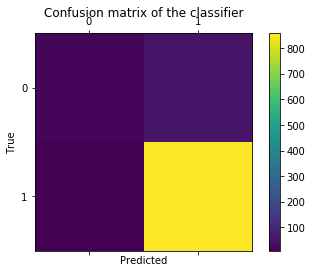

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [49]:
from sklearn.metrics import classification_report
target_names = ['1 rating', '2 rating', '3 rating', '4 rating', '5 rating']
print("Classification Table", classification_report(y_test, predicted, labels=[1, 2, 3, 4, 5]))

Classification Table               precision    recall  f1-score   support

           1       0.92      0.99      0.95       851
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.92      0.99      0.95       851
   macro avg       0.18      0.20      0.19       851
weighted avg       0.92      0.99      0.95       851

